# Is Soju really cannibalizing Beer?
(by Park, Pablo Chanwoo)

### EXECUTIVE SUMMARY
>- ff

### Project description

1. WB has come up with a hypothesis; **"Soju is cannibalizing beer sales".**  
2. Approve or reject the hypothesis using transaction data. (daily summary, 147 locations, for 6 months)


### Project approach

I would like to first define the hypothesis fisrt. By stating that "product A is being cannibalized", I can presume that **1) the sales volume in proportion should be decreasing, 2) product A and the one that is canibalizing should be moving towards negative correlation.** In order to test the hypothesis according to the definitions of cannibalization I understand, studying regression coefficients may seem like a rational approach, and I may also consider studying importance of features in determining demands for beer, while simple EDA may be enough to test hypothesis. On top of it, I may consider clustering data by types of bar, season, or any other features that reflects own characteristics of cluster itself, in order to develop this project further.

### Python libraries for the project

The following libraries will be used for this project:  
- **pandas/numpy**: for data manipulation and basic statistical study
- **seaborn/matplotlib**: for graphic visualization of findings
- **sklearn**: for descriptive analysis
- **re**: for filtering via column names

In [187]:
import pandas as pd

import seaborn as sns
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import re

import sklearn

Populating the interactive namespace from numpy and matplotlib


## 1. EDA

> -

### Data exploration

- As given in instruction, the data is from 147 outlets over 6-month period.
- There are only 3 segments for bars `['Food,Spirits', 'Beer,Food', 'Food']`.
- There are zeroes, but no missing value.
- The data mainly consists of volume(units), revenue, count of oders.
- `Avg. Check Size`(Total Revenue / number of Check) and `Soju Price`(Soju Revenue / Soju Units) seem like derived variables

In [2]:
data = pd.read_excel("c:/testData.xlsx")
data.shape

(16635, 22)

In [5]:
data.head()

,Bar ID,Date,Bar Segmentation,Beer Draught Volume (L),Beer Packaged Volume (L),Total Volume (L),Total Revenue,Beer Revenue,Beer Units,Spirits Revenue,...,Non Alcoholic Revenue,Wine Revenue,Soju Revenue,Soju Units,# Beer Orders,# Beer & Food Orders,# Soju & Beer Orders,# Soju & Food Orders,Avg. Check Size,Soju Price
0,Bar 1,2017-07-01,"Food,Spirits",9.3,6.16,15.46,887100,124500,22,278000,...,23500,0,54000,12,14,14,1,7,26881.818182,4500.0
1,Bar 1,2017-07-02,"Food,Spirits",21.3,2.50,23.80,745800,167500,16,256000,...,24000,0,18000,4,7,7,1,2,46612.500000,4500.0
2,Bar 1,2017-07-03,"Food,Spirits",9.3,2.50,11.80,575100,87000,12,237000,...,10000,0,27000,5,7,7,2,4,26140.909091,5625.0
3,Bar 1,2017-07-04,"Food,Spirits",15.9,7.50,23.40,553500,178000,26,146000,...,4000,0,27000,5,12,12,2,4,34593.750000,5625.0
4,Bar 1,2017-07-05,"Food,Spirits",1.7,8.00,9.70,256600,84000,17,80500,...,0,0,4500,1,7,7,1,1,28511.111111,4500.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16635 entries, 0 to 16634
Data columns (total 22 columns):
Bar ID                      16635 non-null object
Date                        16635 non-null datetime64[ns]
Bar Segmentation            16635 non-null object
Beer Draught Volume (L)     16635 non-null float64
Beer Packaged Volume (L)    16635 non-null float64
Total Volume (L)            16635 non-null float64
Total Revenue               16635 non-null int64
Beer Revenue                16635 non-null int64
Beer Units                  16635 non-null int64
Spirits Revenue             16635 non-null int64
Spirits Units               16635 non-null int64
Food Revenue                16635 non-null int64
Non Alcoholic Revenue       16635 non-null int64
Wine Revenue                16635 non-null int64
Soju Revenue                16635 non-null int64
Soju Units                  16635 non-null int64
# Beer Orders               16635 non-null int64
# Beer & Food Orders        16635 non-nul

In [3]:
pd.options.display.max_columns = None
# display all DataFrame columns to check with my own eyes

data.columns = ['barId', 'date', 'segment', 'draughtV', 'packagedV',
                'totalV', 'totalR', 'beerR', 'beerU', 'spiritsR',
                'spiritsU', 'foodR', 'nonAlcoholR', 'wineR', 'sojuR', 
                'sojuU', 'beerO', 'beerFoodO', 'sojuBeerO', 'sojuFoodO',
               'avgCheck', 'sojuP']
# change column names to index easily

In [13]:
data.head()

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP
0,Bar 1,2017-07-01,"Food,Spirits",9.3,6.16,15.46,887100,124500,22,278000,68,461100,23500,0,54000,12,14,14,1,7,26881.818182,4500.0
1,Bar 1,2017-07-02,"Food,Spirits",21.3,2.50,23.80,745800,167500,16,256000,63,298300,24000,0,18000,4,7,7,1,2,46612.500000,4500.0
2,Bar 1,2017-07-03,"Food,Spirits",9.3,2.50,11.80,575100,87000,12,237000,57,234100,10000,0,27000,5,7,7,2,4,26140.909091,5625.0
3,Bar 1,2017-07-04,"Food,Spirits",15.9,7.50,23.40,553500,178000,26,146000,35,222500,4000,0,27000,5,12,12,2,4,34593.750000,5625.0
4,Bar 1,2017-07-05,"Food,Spirits",1.7,8.00,9.70,256600,84000,17,80500,20,92100,0,0,4500,1,7,7,1,1,28511.111111,4500.0


In [14]:
data.tail()

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP
16630,Bar 147,2017-12-27,Food,28.7,0.66,29.36,1204538,187728,54,83635,23,911358,21817,0,0,0,15,15,0,0,19119.650794,0.0
16631,Bar 147,2017-12-28,Food,43.8,1.65,45.45,1403450,291820,77,58180,16,1035270,18180,0,0,0,22,22,0,0,23007.377049,0.0
16632,Bar 147,2017-12-29,Food,50.9,2.64,53.54,1688716,352273,103,80000,22,1229627,26816,0,0,0,17,17,0,0,19867.247059,0.0
16633,Bar 147,2017-12-30,Food,44.9,1.98,46.88,1577712,309546,91,36360,10,1206445,25361,0,0,0,20,19,0,0,19008.578313,0.0
16634,Bar 147,2017-12-31,Food,37.2,7.92,45.12,2478161,318639,89,54545,15,2043801,61176,0,0,0,28,27,0,0,17329.797203,0.0


In [35]:
data.apply(lambda x: len(x.unique()))
# there are 3 bar segments only out of 147 bars

barId            147
date             184
segment            3
draughtV        4687
packagedV       2416
totalV          7489
totalR         10683
beerR           5395
beerU            474
spiritsR        2997
spiritsU         377
foodR           8772
nonAlcoholR     1738
wineR            353
sojuR           1509
sojuU            219
beerO            198
beerFoodO        188
sojuBeerO         56
sojuFoodO         89
avgCheck       14061
sojuP            252
dtype: int64

In [37]:
data.segment.unique()

array(['Food,Spirits', 'Beer,Food', 'Food'], dtype=object)

In [22]:
data.isna().sum()
# there are no missing values

barId          0
date           0
segment        0
draughtV       0
packagedV      0
totalV         0
totalR         0
beerR          0
beerU          0
spiritsR       0
spiritsU       0
foodR          0
nonAlcoholR    0
wineR          0
sojuR          0
sojuU          0
beerO          0
beerFoodO      0
sojuBeerO      0
sojuFoodO      0
avgCheck       0
sojuP          0
dtype: int64

### Descriptive Analysis

- d  
*In most case, used Units instead of Revenue to explain demand, as there are many factors affecting prices but demand*

Text(0.5,1,'Sales trend by the type of beverage')

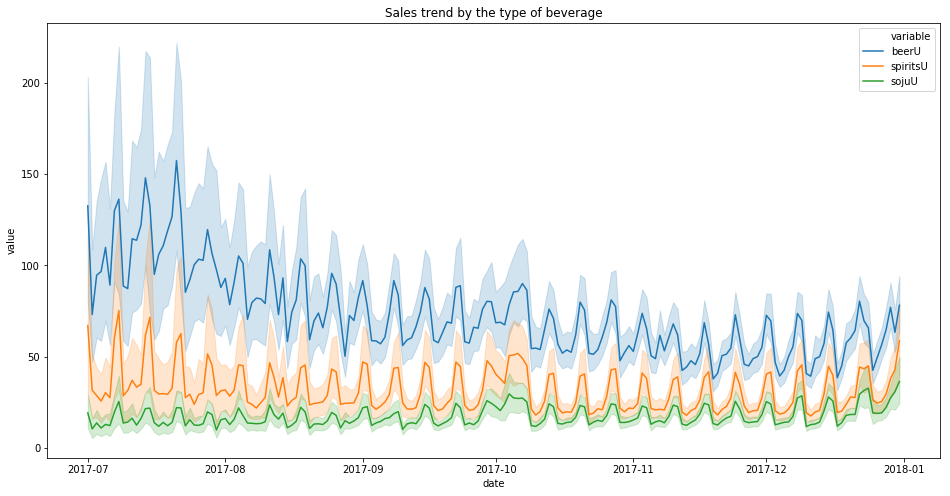

In [61]:
dataLong = data.melt(['barId', 'date', 'segment'])
# convert data into long format to easily visualize
sns.lineplot(data=dataLong[dataLong['variable'].isin(['sojuU', 'beerU', 'spiritsU'])], x = 'date', y='value', hue='variable')
plt.title("Sales trend by the type of beverage")

- It seems like there is a downward sales trend for beer, while soju and spirits remain constant.
- The variance of sales data is getting smaller towards the end of year. (It should be on the other way around in general cases)

In [176]:
tmp = data[['date', 'beerU']]
tmp['month'] = [d.month_name() for d in tmp['date']]
tmpA = tmp.groupby('month').mean()
tmpB = tmp.groupby('month').std()
tmp = pd.merge(tmpA, tmpB, left_index=True, right_index=True)
tmp.columns = ['mean', 'std']
tmp = tmp.iloc[[2,0,5,4,3,1],:]
tmp

C:\Programming\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,mean,std
month,,
July,109.949657,127.784307
August,80.825762,95.144610
September,70.827905,75.716210
October,65.074388,71.730805
November,54.495392,58.723028
December,58.706543,62.453384


Text(0.5,1,'The number of observations by date')

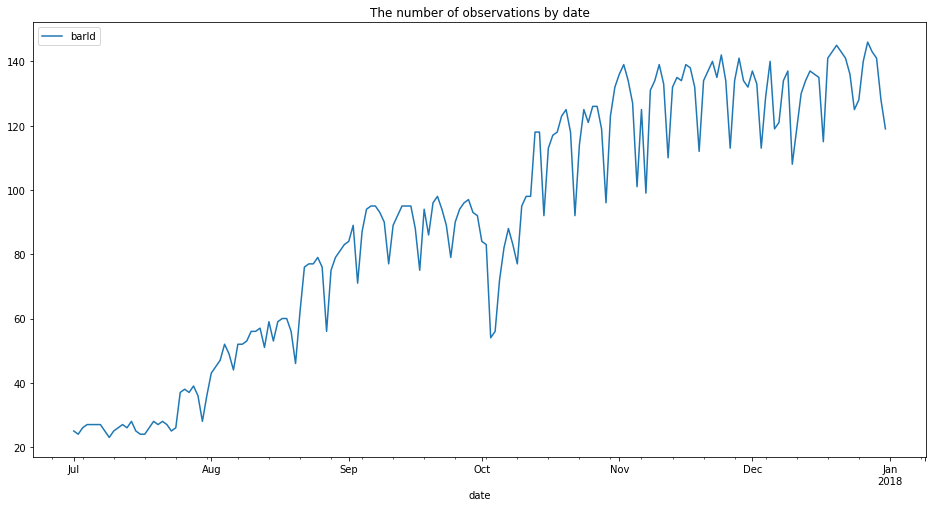

In [177]:
data.groupby('date', as_index=False)['barId'].count().plot(x='date', y = 'barId')
plt.title("The number of observations by date")

In [28]:
data.groupby('date', as_index=False)['barId'].count().sort_values('barId').head()

,date,barId
8,2017-07-09,23
1,2017-07-02,24
16,2017-07-17,24
15,2017-07-16,24
0,2017-07-01,25


- The high variance in the early date of data may have been effected by few observations.
- I can also note that the observations are not evenly available, and this may lead to biased result.(only 23 observations available for the 9th July)

In [31]:
data.groupby('barId', as_index=False)['date'].count().sort_values('date', ascending=False).head(10)

,barId,date
70,Bar 3,184
59,Bar 2,184
55,Bar 16,181
76,Bar 35,181
54,Bar 15,180
1,Bar 10,180
114,Bar 7,180
34,Bar 13,180
92,Bar 5,180
58,Bar 19,179


Text(0.5,0.98,'The sales of beverages in Bars with full observations')

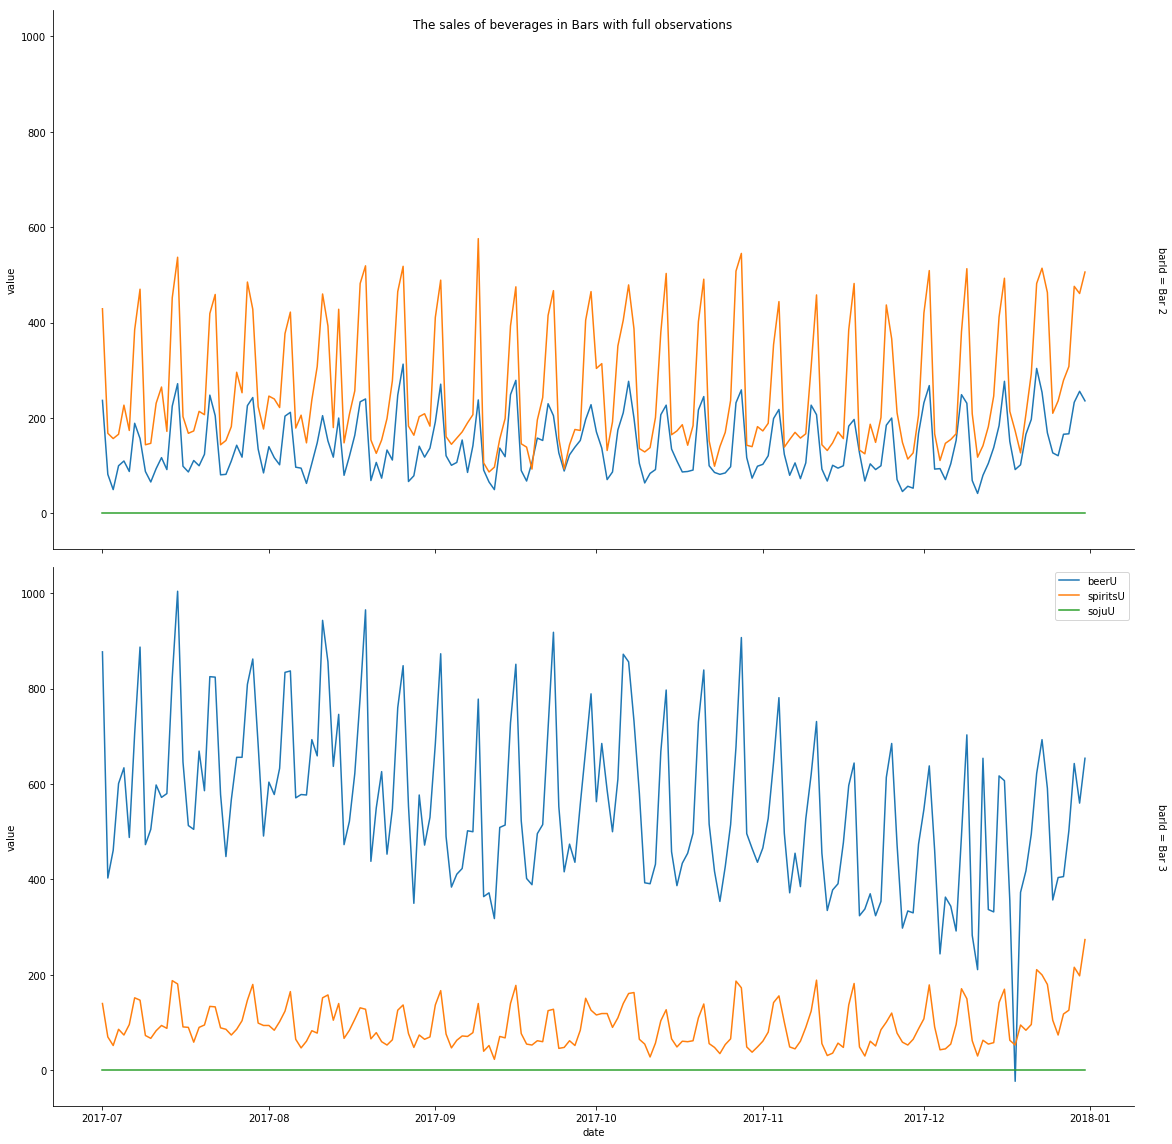

In [70]:
tmp = dataLong[dataLong['variable'].isin(['sojuU', 'beerU', 'spiritsU'])]
tmp = tmp[tmp.barId.isin(['Bar 3', 'Bar 2'])]
sns.FacetGrid(data=tmp, row = 'barId', hue = 'variable', height=8, aspect = 2, margin_titles=True).map(sns.lineplot,'date', 'value')
plt.legend()
plt.suptitle("The sales of beverages in Bars with full observations")

- There are two(2) bars with full data over the observed period.
- Both bars do not seem to sell soju. (unless spirits contains soju-likes.)
- It is difficult to state that the sales trend, for any kinds, is increasing/decreasing.
___

Text(0.5,1,'Correlation matrix for all variables')

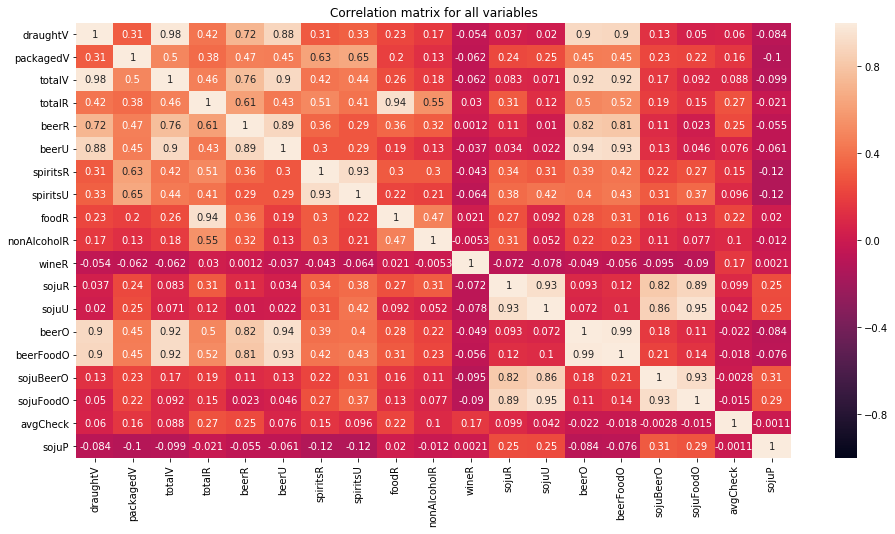

In [171]:
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation matrix for all variables')

- Obviously volume/units are highly correlated against revenue
- To test cannibalization, units refelect demands while revenue may mislead demands (i.e. promotion in beers may end up with more units sold, but less in revenue)
- Should be careful with the variable selection on regression

In [173]:
reCompile = re.compile('R$')
tmp = [not bool(reCompile.search(column)) for column in data.columns]

Text(0.5,1,'correlation matrix without revenue variables')

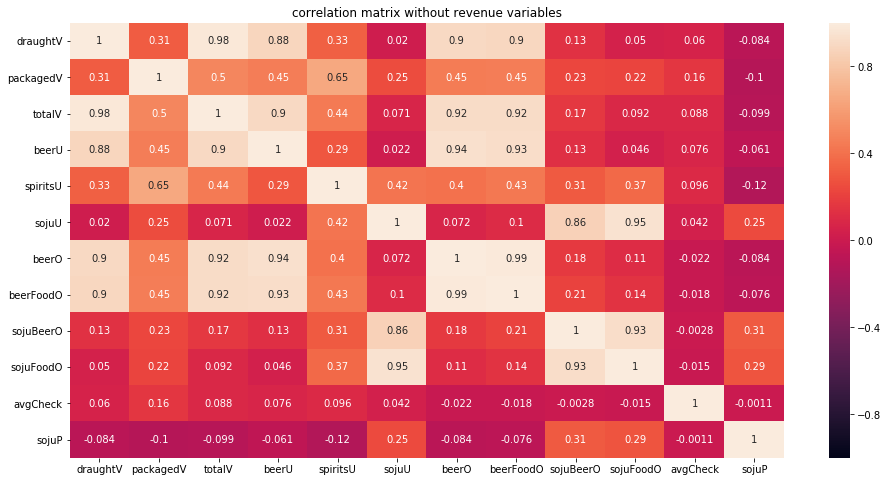

In [174]:
sns.heatmap(data.loc[:,tmp].corr(), vmin=-1, vmax=1, annot=True)
plt.title('correlation matrix without revenue variables')

In [139]:
data[['beerO', 'beerFoodO']].head()

,beerO,beerFoodO
0,14,14
1,7,7
2,7,7
3,12,12
4,7,7


- My interests is largely with variable "Beer Units", and from the correlation matrix it seems there is no relationship betwen "Soju Units" and "Beer Units". (0.022)
- On the other hand, what had caught my attention from correlation table are:
> 1. "Beer Draught Volume(L)" is more determinantal to "Total Volume(L)" of beer from given sample bars.
> 2. "# Beer Orders" and "# Beer & Food Orders" are highly correlated, and also very much correlated with "Beer Units": They almost never orders beer withou food.

In [140]:
data['month'] = [day.month_name() for day in data.date]
# added month as a categorical feature

Text(0.5,1.05,'The difference in correlation between July and December')

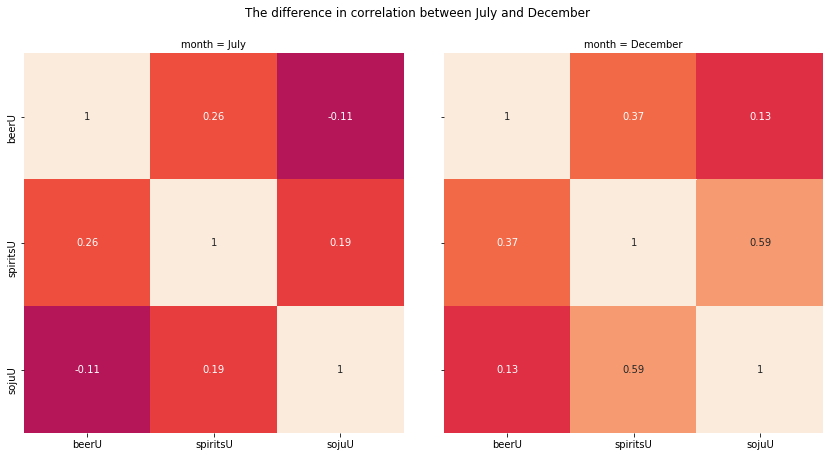

In [170]:
tmp = data[data.month.isin(['July', 'December'])]
tmp = tmp[['beerU', 'spiritsU', 'sojuU', 'month']]
g = sns.FacetGrid(tmp, col = 'month', height=6)
g.map_dataframe(lambda data, color: sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, cbar=False))
plt.suptitle('The difference in correlation between July and December', y = 1.05)

- Comparing correlation for sales volume in July and December, I see that both Soju and Spirits are more positively correlated in December than in July.
___

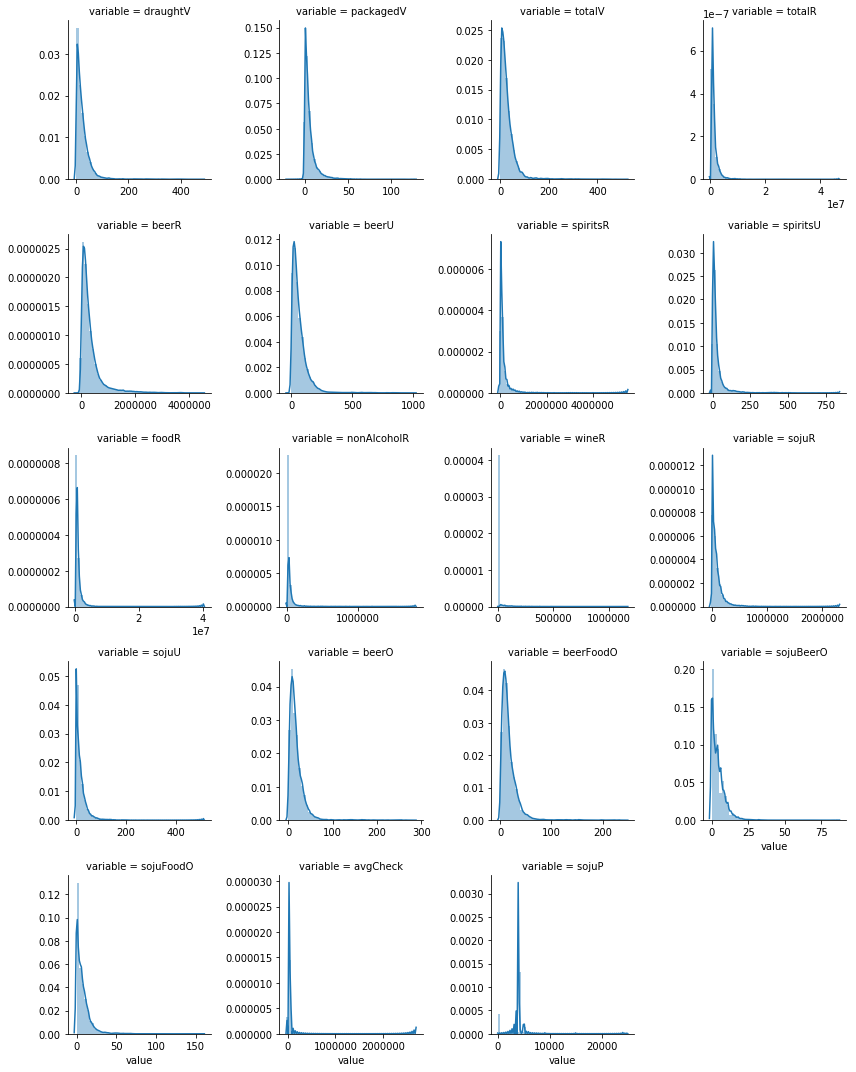

In [184]:
g = sns.FacetGrid(data=dataLong, col = 'variable', col_wrap = 4, sharey=False, sharex=False)
g.map(sns.distplot, 'value')

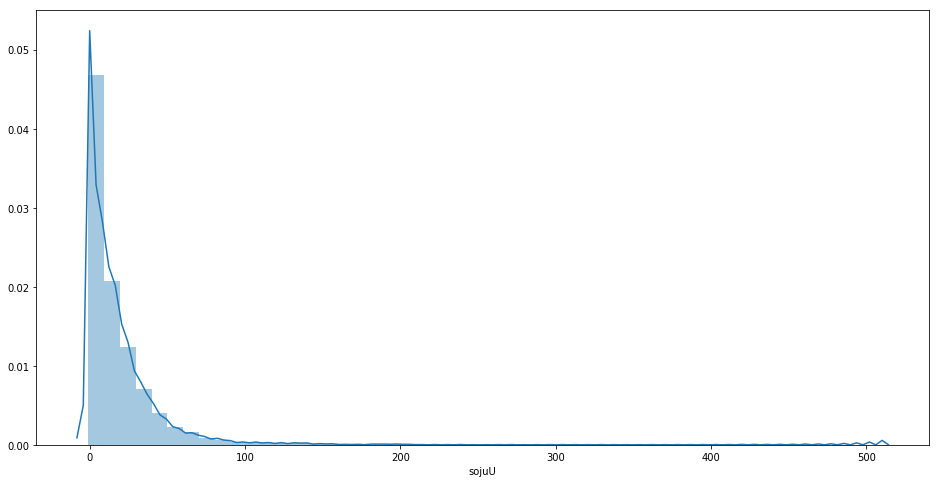

In [186]:
sns.distplot(data.sojuU)

In [189]:
from sklearn.preprocessing import 


In [220]:
log(data.sojuU+ e**(-3))

C:\Programming\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


0        2.489047
1        1.398664
2        1.619346
3        1.619346
4        0.048587
5        1.398664
6        1.952997
7        0.048587
8        2.489047
9        1.952997
10       0.717736
11       1.619346
12       1.398664
13       0.717736
14      -3.000000
15       0.717736
16       1.115072
17       1.619346
18       2.085646
19       1.619346
20       1.398664
21       0.717736
22       0.717736
23       0.717736
24       0.048587
25       2.085646
26       1.952997
27       1.952997
28       1.952997
29       1.115072
           ...   
16605   -3.000000
16606   -3.000000
16607   -3.000000
16608   -3.000000
16609   -3.000000
16610   -3.000000
16611   -3.000000
16612   -3.000000
16613   -3.000000
16614   -3.000000
16615   -3.000000
16616   -3.000000
16617   -3.000000
16618   -3.000000
16619   -3.000000
16620   -3.000000
16621   -3.000000
16622   -3.000000
16623   -3.000000
16624   -3.000000
16625   -3.000000
16626   -3.000000
16627   -3.000000
16628   -3.000000
16629   -3

In [213]:
np.log(data.sojuU+np.power(e,-5)).arrange()

C:\Programming\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


AttributeError: 'Series' object has no attribute 'arrange'

C:\Programming\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
C:\Programming\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Programming\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer

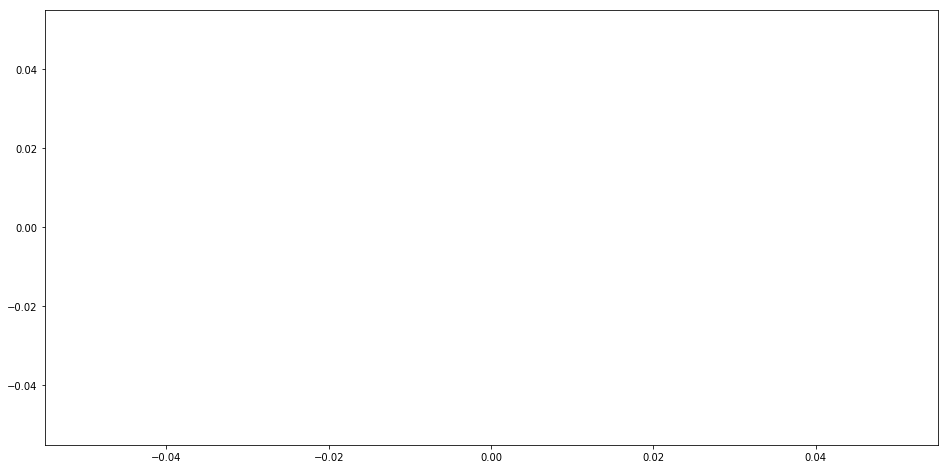

In [214]:
sns.distplot(np.log(data.sojuU+np.power(e,-3)))

In [151]:
data[data.month.isin(['July', 'December'])]

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP,month
0,Bar 1,2017-07-01,"Food,Spirits",9.3,6.16,15.46,887100,124500,22,278000,68,461100,23500,0,54000,12,14,14,1,7,26881.818182,4500.000000,July
1,Bar 1,2017-07-02,"Food,Spirits",21.3,2.50,23.80,745800,167500,16,256000,63,298300,24000,0,18000,4,7,7,1,2,46612.500000,4500.000000,July
2,Bar 1,2017-07-03,"Food,Spirits",9.3,2.50,11.80,575100,87000,12,237000,57,234100,10000,0,27000,5,7,7,2,4,26140.909091,5625.000000,July
3,Bar 1,2017-07-04,"Food,Spirits",15.9,7.50,23.40,553500,178000,26,146000,35,222500,4000,0,27000,5,12,12,2,4,34593.750000,5625.000000,July
4,Bar 1,2017-07-05,"Food,Spirits",1.7,8.00,9.70,256600,84000,17,80500,20,92100,0,0,4500,1,7,7,1,1,28511.111111,4500.000000,July
5,Bar 1,2017-07-06,"Food,Spirits",1.7,13.42,15.12,930200,169500,36,334500,82,378200,44000,0,22500,4,12,11,2,4,35776.923077,5625.000000,July
6,Bar 1,2017-07-07,"Food,Spirits",14.4,16.12,30.52,1457400,268000,49,491500,122,671900,24000,0,31500,7,25,24,3,6,33122.727273,4500.000000,July
7,Bar 1,2017-07-08,"Food,Spirits",13.5,3.50,17.00,717800,126500,20,219000,54,348300,24000,0,4500,1,14,14,1,1,25635.714286,4500.000000,July
8,Bar 1,2017-07-11,"Food,Spirits",4.4,9.66,14.06,736400,121000,24,300000,73,308400,6000,0,54000,12,9,9,1,1,49093.333333,4500.000000,July
9,Bar 1,2017-07-12,"Food,Spirits",3.2,3.00,6.20,287400,48500,8,113000,24,119900,6000,0,45000,7,4,4,1,4,26127.272727,7875.000000,July


In [142]:
tmp

,barId,date,segment,draughtV,packagedV,totalV,totalR,beerR,beerU,spiritsR,spiritsU,foodR,nonAlcoholR,wineR,sojuR,sojuU,beerO,beerFoodO,sojuBeerO,sojuFoodO,avgCheck,sojuP,month
0,Bar 1,2017-07-01,"Food,Spirits",9.30,6.16,15.46,887100,124500,22,278000,68,461100,23500,0,54000,12,14,14,1,7,26881.818182,4500.000000,July
1,Bar 1,2017-07-02,"Food,Spirits",21.30,2.50,23.80,745800,167500,16,256000,63,298300,24000,0,18000,4,7,7,1,2,46612.500000,4500.000000,July
2,Bar 1,2017-07-03,"Food,Spirits",9.30,2.50,11.80,575100,87000,12,237000,57,234100,10000,0,27000,5,7,7,2,4,26140.909091,5625.000000,July
3,Bar 1,2017-07-04,"Food,Spirits",15.90,7.50,23.40,553500,178000,26,146000,35,222500,4000,0,27000,5,12,12,2,4,34593.750000,5625.000000,July
4,Bar 1,2017-07-05,"Food,Spirits",1.70,8.00,9.70,256600,84000,17,80500,20,92100,0,0,4500,1,7,7,1,1,28511.111111,4500.000000,July
5,Bar 1,2017-07-06,"Food,Spirits",1.70,13.42,15.12,930200,169500,36,334500,82,378200,44000,0,22500,4,12,11,2,4,35776.923077,5625.000000,July
6,Bar 1,2017-07-07,"Food,Spirits",14.40,16.12,30.52,1457400,268000,49,491500,122,671900,24000,0,31500,7,25,24,3,6,33122.727273,4500.000000,July
7,Bar 1,2017-07-08,"Food,Spirits",13.50,3.50,17.00,717800,126500,20,219000,54,348300,24000,0,4500,1,14,14,1,1,25635.714286,4500.000000,July
8,Bar 1,2017-07-11,"Food,Spirits",4.40,9.66,14.06,736400,121000,24,300000,73,308400,6000,0,54000,12,9,9,1,1,49093.333333,4500.000000,July
9,Bar 1,2017-07-12,"Food,Spirits",3.20,3.00,6.20,287400,48500,8,113000,24,119900,6000,0,45000,7,4,4,1,4,26127.272727,7875.000000,July


- correlation
- distribution

In [88]:
a = re.compile('[a-z]*U')

In [90]:
a.search('draught')

In [ ]:
data['checks'] = data.totalR / data.avgCheck
data

In [78]:
a = 'sss'

In [79]:
a.rfind('s')

2

In [19]:
tmp = data.loc[:,['totalR', 'beerR', 'spiritsR', 'foodR', 'nonAlcoholR', 'wineR']]
tmp['sumR'] = tmp.apply(lambda x: x[1:].sum(), axis=1)
(tmp.totalR==tmp.sumR).sum()

13817

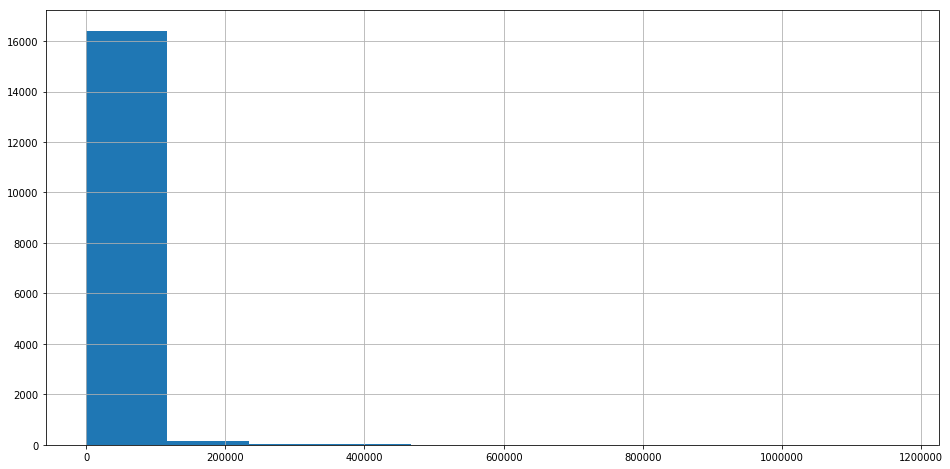

In [20]:
data.wineR.hist()